In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
data_path = r'data/Fertility/fertility_diagnosis.csv'
df = pd.read_csv(data_path)

In [5]:
df

,season,age,diseases,accidents_trauma,surgical_intervention,high_fever,alcohol_consumption,smoking,hours_sitting,diagnosis
0,-0.33,0.69,0,1,1,0,0.8,0,0.88,N
1,-0.33,0.94,1,0,1,0,0.8,1,0.31,O
2,-0.33,0.50,1,0,0,0,1.0,-1,0.50,N
3,-0.33,0.75,0,1,1,0,1.0,-1,0.38,N
4,-0.33,0.67,1,1,0,0,0.8,-1,0.50,O
...,...,...,...,...,...,...,...,...,...,...
95,-1.00,0.67,1,0,0,0,1.0,-1,0.50,N
96,-1.00,0.61,1,0,0,0,0.8,0,0.50,N
97,-1.00,0.67,1,1,1,0,1.0,-1,0.31,N
98,-1.00,0.64,1,0,1,0,1.0,0,0.19,N


In [70]:
df = df.replace('?', np.nan)

In [20]:
df.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jundice', 'austim', 'contry_of_res', 'used_app_before',
       'result', 'age_desc', 'relation', 'Class/ASD'],
      dtype='object')

[Text(0, 0, '0.73'), Text(0, 0, '0.27')]

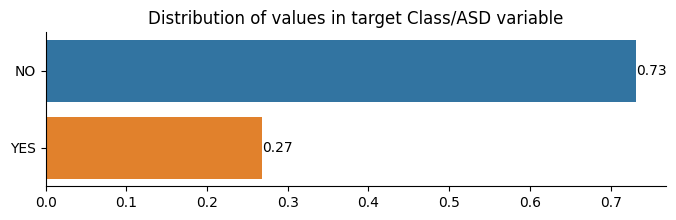

In [51]:
class_counts = df['Class/ASD'].value_counts()/len(df['Class/ASD'])
_, ax = plt.subplots(figsize=(8, 2))
sns.despine()
sns.barplot(x=class_counts.values, y=class_counts.index)
ax.set(title='Distribution of values in target Class/ASD variable')
ax.bar_label(ax.containers[0], fmt='{:.2f}')

Text(0.5, 1.0, 'Distribution of age')

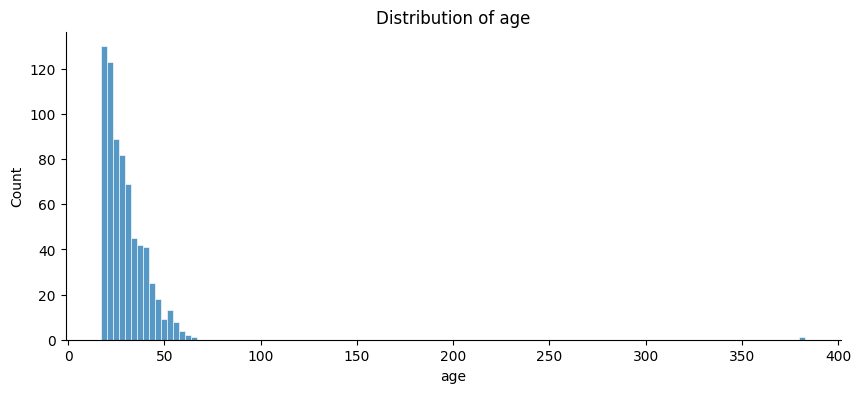

In [106]:
_, ax = plt.subplots(figsize=(10, 4))
sns.despine()
sns.histplot(df, x='age', ax=ax, edgecolor='white')
ax.set_title('Distribution of age')

[Text(0.5, 1.0, 'Distribution of test score'), Text(0.5, 0, 'test score')]

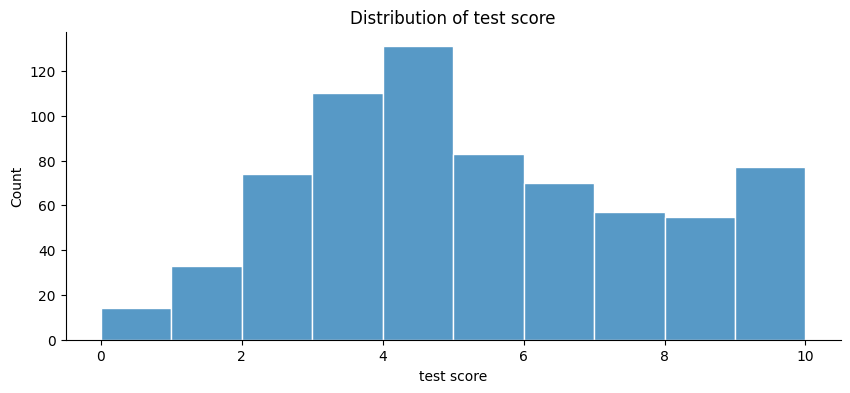

In [105]:
_, ax = plt.subplots(figsize=(10, 4))
sns.despine()
sns.histplot(df, x='result', ax=ax, edgecolor='white', bins=10, color=sns.color_palette()[0])
ax.set(title='Distribution of test score', xlabel='test score')

[Text(0, 0, '0.52'), Text(0, 0, '0.48')]

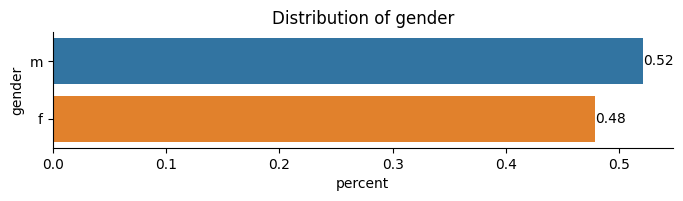

In [92]:
gender_counts = df['gender'].value_counts()/len(df['gender'])
_, ax = plt.subplots(figsize=(8, 1.5))
sns.despine()
sns.barplot(x=gender_counts.values, y=gender_counts.index)
ax.set(title='Distribution of gender', xlabel='percent', ylabel='gender')
ax.bar_label(ax.containers[0], fmt='{:.2f}')

[Text(0, 0, '0.33'),
 Text(0, 0, '0.17'),
 Text(0, 0, '0.13'),
 Text(0, 0, '0.06'),
 Text(0, 0, '0.05'),
 Text(0, 0, '0.04'),
 Text(0, 0, '0.03'),
 Text(0, 0, '0.02'),
 Text(0, 0, '0.02'),
 Text(0, 0, '0.01'),
 Text(0, 0, '0.00')]

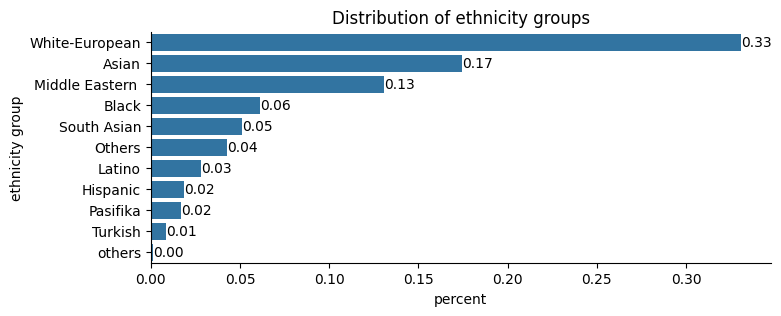

In [90]:
ethnicity_counts = df['ethnicity'].value_counts()/len(df['ethnicity'])
_, ax = plt.subplots(figsize=(8, 3))
sns.despine()
sns.barplot(x=ethnicity_counts.values, y=ethnicity_counts.index, color=sns.color_palette()[0])
ax.set(title='Distribution of ethnicity groups', xlabel='percent', ylabel='ethnicity group')
ax.bar_label(ax.containers[0], fmt='{:.2f}')

[Text(0, 0, '0.0028'), Text(0, 0, '0.1349'), Text(0, 0, '0.1349')]

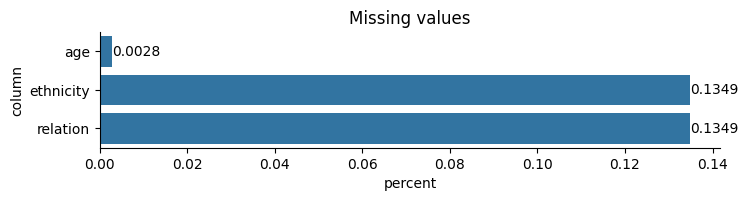

In [91]:
missing_counts = df.isna().sum()/len(df)
missing_counts = missing_counts[missing_counts.values > 0]
_, ax = plt.subplots(figsize=(8, 1.5))
sns.despine()
sns.barplot(x=missing_counts.values, y=missing_counts.index, color=sns.color_palette()[0])
ax.set(title='Missing values', xlabel='percent', ylabel='column')
ax.bar_label(ax.containers[0], fmt='{:.4f}')

In [109]:
for c in df.columns:
    if 'Score' in c:
        

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jundice', 'austim', 'contry_of_res', 'used_app_before',
       'result', 'age_desc', 'relation', 'Class/ASD'],
      dtype='object')

In [133]:
score='A1_Score'
score_counts = pd.DataFrame(df.groupby('Class/ASD')[score].value_counts() / len(df))
score_counts.columns=['percent']
score_counts = score_counts.reset_index(drop=False)
score_counts

,Class/ASD,A1_Score,percent
0,NO,1,0.468750
1,NO,0,0.262784
2,YES,1,0.252841
3,YES,0,0.015625


[Text(0, 0, '0.2628'), Text(0, 0, '0.0156')]

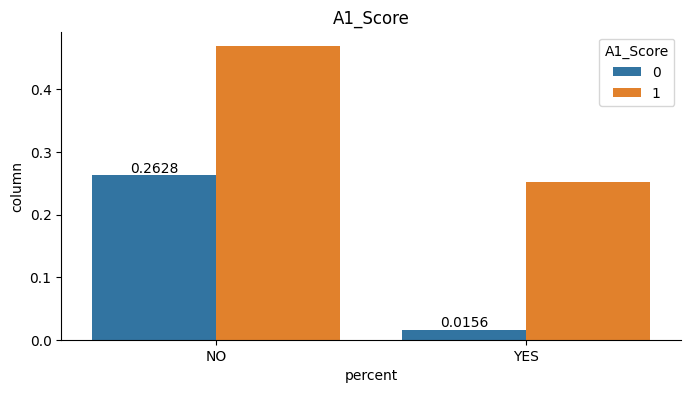

In [139]:
_, ax = plt.subplots(figsize=(8, 4))
sns.despine()
sns.barplot(score_counts, y='percent', hue=score, x='Class/ASD')
ax.set(title=f'{score}', xlabel='percent', ylabel='column')
ax.bar_label(ax.containers[0], fmt='{:.4f}')

In [150]:
df.groupby(['Class/ASD', 'result']).result.count()

Class/ASD  result
NO         0.0        14
           1.0        33
           2.0        74
           3.0       110
           4.0       131
           5.0        83
           6.0        70
YES        7.0        57
           8.0        55
           9.0        47
           10.0       30
Name: result, dtype: int64